In [1]:
# python 3 version of code for making your own julia fractal
# 
# blog and book at http://makeyourownmandelbrot.blogspot.co.uk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# set the location and size of the atlas rectangle
xvalues = linspace(-2, 2, 1000)
yvalues = linspace(-2, 2, 1000)

# size of these lists of x and y values
xlen = len(xvalues)
ylen = len(yvalues)

# value of c (unique for each Julia set)
c = complex(-0.768662, 0.0930477)

In [3]:
# julia function, takes the fixed parameters z and c, and the maximum number of iterations maxiter, as inputs
def julia(z, c, maxiter):
    
    # start iterating and stop when it's done maxiter times
    for iteration in range(maxiter):
        
        # the main function which generates the output value of z from the input values using the formula (z^2) + c
        z = (z*z) + c
        
        # check if the (pythagorean) magnitude of the output complex number z is bigger than 4, and if so stop iterating as we've diverged already
        if abs(z) > 4:
            break
            pass
        pass
    
    # return the number of iterations we actually did, not the final value of z, as this tells us how quickly the values diverged past the magnitude threshold of 4
    return iteration

In [4]:
# create an array of the right size to represent the atlas, we use the number of items in xvalues and yvalues
atlas = empty((xlen,ylen))

# go through each point in this atlas array and test to see how many iterations are needed to diverge (or reach the maximum iterations when not diverging)
for ix in range(xlen):
    for iy in range(ylen):
        
        # at this point in the array, work out what the actual real and imaginary parts of x are by looking it up in the xvalue and yvalue lists
        zx = xvalues[ix]
        zy = yvalues[iy]
        z = complex(zx, zy)
        
        # now we know what c is for this place in the atlas, apply the julia() function to return the number of iterations it took to diverge
        # we use 80 maximum iterations to stop and accept the function didn't diverge
        atlas[ix,iy] = julia(z, c, 80)
        
        pass
    pass

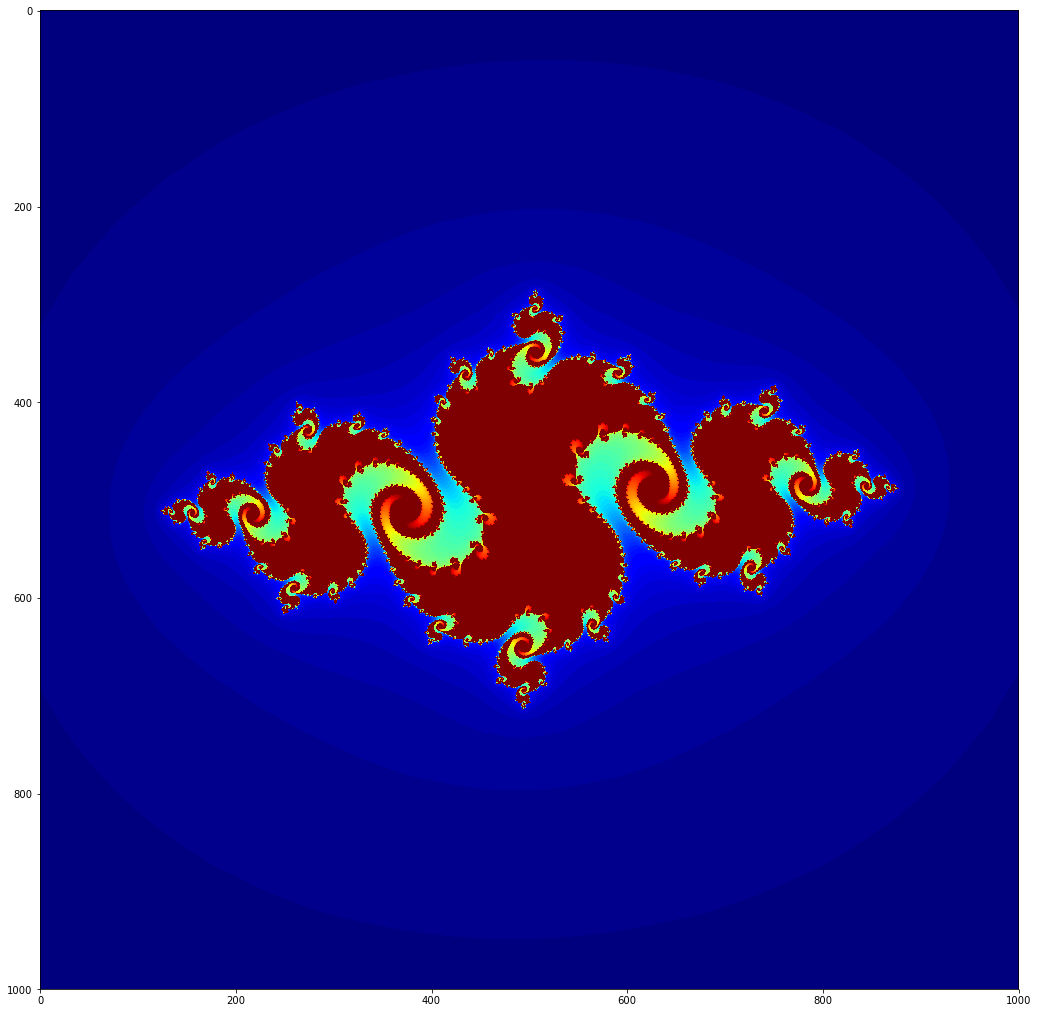

In [6]:
# set the figure size
figsize(18,18)

# plot the array atlas as an image, with its values represented as colours, peculiarity of python that we have to transpose the array
imshow(atlas.T, interpolation="nearest", cmap="jet")